In [2]:
#https://www.youtube.com/watch?v=_-UCcuB8nbw
import pandas as pd

housing_pd = pd.read_csv('kaggle/housing.csv')
housing_pd.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing_pd['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [4]:
#use longitude and latitude to guess the median house value
#want randomness in the dataset
housing_pd_shuffled = housing_pd.sample(n=len(housing_pd), random_state=1)
housing_pd_shuffled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,<1H OCEAN
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,INLAND
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,NEAR BAY
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,NEAR BAY
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,205300.0,<1H OCEAN
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0,<1H OCEAN
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,104800.0,<1H OCEAN
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,140700.0,INLAND


In [5]:
#change ocean_proximity to dummy variables
#expands columns to use the 5 variables as headers with 1 or 0 if it is contained in the row
pd.get_dummies(housing_pd_shuffled['ocean_proximity']).head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4712,1,0,0,0,0
2151,0,1,0,0,0
15927,0,0,0,1,0
82,0,0,0,1,0
8161,1,0,0,0,0


In [6]:
housing_pd_shuffled.drop('ocean_proximity', axis=1).head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0


In [7]:
#try out the slices above
#when ready concat the two slices together to make housing_pd_final
housing_pd_final = pd.concat([housing_pd_shuffled.drop('ocean_proximity', axis=1), pd.get_dummies(housing_pd_shuffled['ocean_proximity'])], axis=1)
housing_pd_final

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,1,0,0,0,0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,0,1,0,0,0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,0,0,0,1,0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,0,0,0,1,0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,205300.0,1,0,0,0,0
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0,1,0,0,0,0
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,104800.0,1,0,0,0,0
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,140700.0,0,1,0,0,0


In [10]:
#moving median_house_value to the last column
housing_pd_final = housing_pd_final[['longitude','latitude',
                                     'housing_median_age','total_rooms',
                                     'total_bedrooms','population',
                                     'households','median_income',
                                     '<1H OCEAN',
                                     'INLAND','ISLAND',
                                     'NEAR BAY','NEAR OCEAN', 'median_house_value']]

In [11]:
housing_pd_final

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,1,0,0,0,0,355000.0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,0,1,0,0,0,70700.0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,0,0,0,1,0,229400.0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,0,0,0,1,0,112500.0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,1,0,0,0,0,225400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,1,0,0,0,0,205300.0
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,1,0,0,0,0,500001.0
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,1,0,0,0,0,104800.0
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,0,1,0,0,0,140700.0


In [13]:
#null values exist in the dataset
#remove any rows containing a null value
housing_pd_final = housing_pd_final.dropna()
len(housing_pd_final)

20433

In [14]:
#splitting the data into training and testing
#you want the lowest test error number
#use train, test, validation sets
train_pd, test_pd, val_pd = housing_pd_final[:18000],housing_pd_final[18000:19217], housing_pd_final[19215:]
len(train_pd), len(test_pd), len(val_pd)

(18000, 1217, 1218)

In [23]:
#X_train is all columns except median house value, y_train is median house value
X_train, y_train = train_pd.to_numpy()[:, :-1], train_pd.to_numpy()[:, -1]
X_val, y_val = val_pd.to_numpy()[:, :-1], val_pd.to_numpy()[:, -1]
X_test, y_test = test_pd.to_numpy()[:, :-1], test_pd.to_numpy()[:, -1]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape  
#the x value lining up here shows that all is in order

((18000, 13), (18000,), (1218, 13), (1218,), (1217, 13), (1217,))

In [22]:
#shape the x lines up for both
X_train.shape

(18000, 13)

In [21]:
y_train.shape

(18000,)

In [26]:
#scaling or transforming the data
#before training going to process the data
#need the scale of median income to be closer to total rows (take the reduction out)
#standardizes the data (normal distribution)
#brings all columns to the same scale
from sklearn.preprocessing import StandardScaler
import numpy as np

#focuses the median_income
#don't want to change columns like categories or latitude/longitude
scaler = StandardScaler().fit(X_train[:,:8])

def preprocessor(X):
    A = np.copy(X)
    A[:, :8] = scaler.transform(A[:,:8])
    return A

X_train_preprocessed = preprocessor(X_train)
X_train_preprocessed

array([[ 0.60344338, -0.73607301,  0.82084451, ...,  0.        ,
         0.        ,  0.        ],
       [-0.10512186,  0.53710782,  0.66177382, ...,  0.        ,
         0.        ,  0.        ],
       [-1.42245442,  0.98178495,  1.37759191, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.59346359, -0.7313922 , -0.61079167, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.12738246, -0.7313922 ,  0.90037985, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.92279673, -0.94202873, -0.61079167, ...,  0.        ,
         0.        ,  0.        ]])

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>],
       [<AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>],
       [<AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>,
        <AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>],
       [<AxesSubplot:title={'center':'12'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

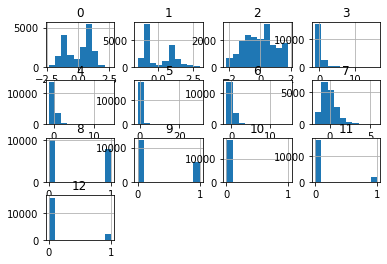

In [36]:
#look for an even normal distribution
pd.DataFrame(X_train_preprocessed).hist()

In [37]:
#scaling or transforming the data
#before training going to process the data
#need the scale of median income to be closer to total rows (take the reduction out)
#standardizes the data (normal distribution)
#brings all columns to the same scale
from sklearn.preprocessing import StandardScaler
import numpy as np

#focuses the median_income
#don't want to change columns like categories or latitude/longitude
scaler = StandardScaler().fit(X_train[:,:8])

def preprocessor(X):
    A = np.copy(X)
    A[:, :8] = scaler.transform(A[:,:8])
    return A

X_train, X_val, X_test = preprocessor(X_train), preprocessor(X_val), preprocessor(X_test)

In [38]:
X_train.shape, X_val.shape, X_test.shape

((18000, 13), (1218, 13), (1217, 13))

In [43]:
#mean squared error model
#average squared error
#sum((y_hat(x) - y)^2) / n
#bigger is worse, lower is better (0 is best)
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression

lm = LinearRegression().fit(X_train, y_train)
#training error, validation error
#if validation error is way higher than training error then you have overfitting
#model tried too hard to fit the data
mse(lm.predict(X_train), y_train, squared=False),mse(lm.predict(X_val), y_val, squared=False)

(68593.05578127236, 71382.43558330165)

In [50]:
#given the input from the training find the things closest to you, check what the output is and average them
#k nearest neighbors
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10).fit(X_train, y_train)
mse(knn.predict(X_train), y_train, squared=False),mse(knn.predict(X_val), y_val, squared=False)
#the output is saying that we have overfit at 2 > going up n neighbors the values are closer together which is better

(53759.09908812057, 62161.22860469906)

In [57]:
#random forest
#max_depth 2 the values are too spread (overfit) increase max_depth to bring the values closer
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=10).fit(X_train,y_train)
mse(rfr.predict(X_train), y_train, squared=False),mse(rfr.predict(X_val), y_val, squared=False)

(43556.30635114892, 53615.15482733427)

In [64]:
#grading boosting model
#adjust n_estimators to get the values close
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=250).fit(X_train,y_train)
mse(gbr.predict(X_train), y_train, squared=False),mse(gbr.predict(X_val), y_val, squared=False)

(47274.822590721575, 51210.606733472116)

In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
#Making a neural network out of many layers in order, sequential is an in order set of layers

from tensorflow.keras.callbacks import ModelCheckpoint
#as the model trains it counts runs through the training as epochs
#each epoch updates the model
#model checkpoint is for saving the model
#want to save the model with the lowest validation loss

from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

simple_nn = Sequential()
simple_nn.add(InputLayer((13,)))
simple_nn.add(Dense(2, 'relu'))
simple_nn.add(Dense(1, 'linear'))

#make bigger jumps for optimizations (learning_rate)
#having a lower difference between root_mean_squared_error and val_root_mean_squared_error is best
#having a lower difference and a lower error amount is optimal
#high value here is a case of underfitting
opt = Adam(learning_rate=.1)
cp = ModelCheckpoint('models/simple_nn', save_best_only=True)
simple_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])
simple_nn.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[cp], epochs=100)

Epoch 1/100
563/563 [==============================] - 2s 2ms/step - loss: 52419362816.0000 - root_mean_squared_error: 228952.7500 - val_loss: 44256817152.0000 - val_root_mean_squared_error: 210373.0469
Epoch 2/100
563/563 [==============================] - 1s 2ms/step - loss: 31526184960.0000 - root_mean_squared_error: 177556.1406 - val_loss: 19772827648.0000 - val_root_mean_squared_error: 140615.8906
Epoch 3/100
563/563 [==============================] - 1s 2ms/step - loss: 12534792192.0000 - root_mean_squared_error: 111958.8828 - val_loss: 7866293248.0000 - val_root_mean_squared_error: 88692.1250
Epoch 4/100
563/563 [==============================] - 1s 2ms/step - loss: 6176158720.0000 - root_mean_squared_error: 78588.5391 - val_loss: 5545659904.0000 - val_root_mean_squared_error: 74469.1875
Epoch 5/100
563/563 [==============================] - 1s 2ms/step - loss: 5104566784.0000 - root_mean_squared_error: 71446.2500 - val_loss: 5243716608.0000 - val_root_mean_squared_error: 72413.

563/563 [==============================] - 1s 2ms/step - loss: 4586917888.0000 - root_mean_squared_error: 67726.7891 - val_loss: 4986440704.0000 - val_root_mean_squared_error: 70614.7344
Epoch 26/100
563/563 [==============================] - 1s 1ms/step - loss: 4583183872.0000 - root_mean_squared_error: 67699.2188 - val_loss: 5008830976.0000 - val_root_mean_squared_error: 70773.0938
Epoch 27/100
563/563 [==============================] - 1s 1ms/step - loss: 4580310016.0000 - root_mean_squared_error: 67677.9844 - val_loss: 4986562560.0000 - val_root_mean_squared_error: 70615.5938
Epoch 28/100
563/563 [==============================] - 1s 1ms/step - loss: 4577619968.0000 - root_mean_squared_error: 67658.1094 - val_loss: 4993804800.0000 - val_root_mean_squared_error: 70666.8594
Epoch 29/100
563/563 [==============================] - 1s 2ms/step - loss: 4575523328.0000 - root_mean_squared_error: 67642.6172 - val_loss: 4979953152.0000 - val_root_mean_squared_error: 70568.7812
Epoch 30/100


563/563 [==============================] - 1s 2ms/step - loss: 4479112704.0000 - root_mean_squared_error: 66926.1719 - val_loss: 4829453312.0000 - val_root_mean_squared_error: 69494.2656
Epoch 54/100
563/563 [==============================] - 1s 2ms/step - loss: 4474865664.0000 - root_mean_squared_error: 66894.4375 - val_loss: 4824619520.0000 - val_root_mean_squared_error: 69459.4844
Epoch 55/100
563/563 [==============================] - 1s 2ms/step - loss: 4470342656.0000 - root_mean_squared_error: 66860.6250 - val_loss: 4818863616.0000 - val_root_mean_squared_error: 69418.0391
Epoch 56/100
563/563 [==============================] - 1s 1ms/step - loss: 4463628800.0000 - root_mean_squared_error: 66810.3906 - val_loss: 4836271616.0000 - val_root_mean_squared_error: 69543.3047
Epoch 57/100
563/563 [==============================] - 1s 1ms/step - loss: 4461976576.0000 - root_mean_squared_error: 66798.0312 - val_loss: 4831609344.0000 - val_root_mean_squared_error: 69509.7812
Epoch 58/100


Epoch 83/100
563/563 [==============================] - 1s 2ms/step - loss: 4385441280.0000 - root_mean_squared_error: 66222.6641 - val_loss: 4710799360.0000 - val_root_mean_squared_error: 68635.2656
Epoch 84/100
563/563 [==============================] - 1s 1ms/step - loss: 4384642560.0000 - root_mean_squared_error: 66216.6328 - val_loss: 4718417920.0000 - val_root_mean_squared_error: 68690.7422
Epoch 85/100
563/563 [==============================] - 1s 1ms/step - loss: 4382332928.0000 - root_mean_squared_error: 66199.1875 - val_loss: 4722541568.0000 - val_root_mean_squared_error: 68720.7500
Epoch 86/100
563/563 [==============================] - 1s 1ms/step - loss: 4381895168.0000 - root_mean_squared_error: 66195.8828 - val_loss: 4720721408.0000 - val_root_mean_squared_error: 68707.5078
Epoch 87/100
563/563 [==============================] - 1s 1ms/step - loss: 4379002368.0000 - root_mean_squared_error: 66174.0312 - val_loss: 4715335680.0000 - val_root_mean_squared_error: 68668.3047


In [69]:
from tensorflow.keras.models import load_model
simple_nn = load_model('models/simple_nn')
mse(simple_nn.predict(X_train), y_train, squared=False),mse(simple_nn.predict(X_val), y_val, squared=False)

(66043.51627039532, 68499.96607635058)

In [73]:
medium_nn = Sequential()
medium_nn.add(InputLayer((13,)))
#increasing the relus increases the complexity of the neural network
medium_nn.add(Dense(32, 'relu'))
medium_nn.add(Dense(16, 'relu'))
medium_nn.add(Dense(1, 'linear'))


opt = Adam(learning_rate=.1)
cp = ModelCheckpoint('models/medium_nn', save_best_only=True)
medium_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])
medium_nn.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[cp], epochs=100)

Epoch 1/100
563/563 [==============================] - 2s 2ms/step - loss: 8836112384.0000 - root_mean_squared_error: 94000.6016 - val_loss: 4908678656.0000 - val_root_mean_squared_error: 70061.9609
Epoch 2/100
563/563 [==============================] - 1s 2ms/step - loss: 4499560448.0000 - root_mean_squared_error: 67078.7656 - val_loss: 4656729088.0000 - val_root_mean_squared_error: 68240.2344
Epoch 3/100
563/563 [==============================] - 1s 2ms/step - loss: 4404940800.0000 - root_mean_squared_error: 66369.7266 - val_loss: 4588856320.0000 - val_root_mean_squared_error: 67741.1016
Epoch 4/100
563/563 [==============================] - 1s 2ms/step - loss: 4328513024.0000 - root_mean_squared_error: 65791.4375 - val_loss: 4571438080.0000 - val_root_mean_squared_error: 67612.4141
Epoch 5/100
563/563 [==============================] - 1s 3ms/step - loss: 4296289792.0000 - root_mean_squared_error: 65546.0859 - val_loss: 4459494400.0000 - val_root_mean_squared_error: 66779.4453
Epoch

Epoch 33/100
563/563 [==============================] - 1s 2ms/step - loss: 3586134784.0000 - root_mean_squared_error: 59884.3438 - val_loss: 3922208000.0000 - val_root_mean_squared_error: 62627.5352
Epoch 34/100
563/563 [==============================] - 1s 2ms/step - loss: 3502688256.0000 - root_mean_squared_error: 59183.5117 - val_loss: 3947698688.0000 - val_root_mean_squared_error: 62830.7148
Epoch 35/100
563/563 [==============================] - 1s 2ms/step - loss: 3454671104.0000 - root_mean_squared_error: 58776.4492 - val_loss: 3807090176.0000 - val_root_mean_squared_error: 61701.6211
Epoch 36/100
563/563 [==============================] - 1s 2ms/step - loss: 3427915264.0000 - root_mean_squared_error: 58548.4023 - val_loss: 3885869056.0000 - val_root_mean_squared_error: 62336.7383
Epoch 37/100
563/563 [==============================] - 1s 2ms/step - loss: 3390309632.0000 - root_mean_squared_error: 58226.3672 - val_loss: 3748165376.0000 - val_root_mean_squared_error: 61222.2617


563/563 [==============================] - 1s 3ms/step - loss: 2847235584.0000 - root_mean_squared_error: 53359.4922 - val_loss: 3274593024.0000 - val_root_mean_squared_error: 57224.0586
Epoch 64/100
563/563 [==============================] - 1s 2ms/step - loss: 2864356096.0000 - root_mean_squared_error: 53519.6797 - val_loss: 3268236800.0000 - val_root_mean_squared_error: 57168.4961
Epoch 65/100
563/563 [==============================] - 1s 2ms/step - loss: 2843103232.0000 - root_mean_squared_error: 53320.7578 - val_loss: 3317525504.0000 - val_root_mean_squared_error: 57597.9648
Epoch 66/100
563/563 [==============================] - 1s 2ms/step - loss: 2846110976.0000 - root_mean_squared_error: 53348.9531 - val_loss: 3244487936.0000 - val_root_mean_squared_error: 56960.4062
Epoch 67/100
563/563 [==============================] - 1s 2ms/step - loss: 2843819776.0000 - root_mean_squared_error: 53327.4766 - val_loss: 3292946944.0000 - val_root_mean_squared_error: 57384.2031
Epoch 68/100


563/563 [==============================] - 1s 2ms/step - loss: 2731175680.0000 - root_mean_squared_error: 52260.6523 - val_loss: 3212872960.0000 - val_root_mean_squared_error: 56682.2109
Epoch 99/100
563/563 [==============================] - 1s 2ms/step - loss: 2713063168.0000 - root_mean_squared_error: 52087.0742 - val_loss: 3275399168.0000 - val_root_mean_squared_error: 57231.1016
Epoch 100/100
563/563 [==============================] - 1s 2ms/step - loss: 2730418432.0000 - root_mean_squared_error: 52253.4062 - val_loss: 3219051520.0000 - val_root_mean_squared_error: 56736.6875


In [74]:
medium_nn = load_model('models/medium_nn')
mse(medium_nn.predict(X_train), y_train, squared=False),mse(medium_nn.predict(X_val), y_val, squared=False)
#better results since the difference is smaller and error is lower

(51081.05926126933, 56110.45759534638)

In [76]:
large_nn = Sequential()
large_nn.add(InputLayer((13,)))
#increasing the relus increases the complexity of the neural network
large_nn.add(Dense(256, 'relu'))
large_nn.add(Dense(128, 'relu'))
large_nn.add(Dense(64, 'relu'))
large_nn.add(Dense(32, 'relu'))
large_nn.add(Dense(1, 'linear'))


opt = Adam(learning_rate=.1)
cp = ModelCheckpoint('models/large_nn', save_best_only=True)
large_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])
large_nn.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[cp], epochs=100)

Epoch 1/100
563/563 [==============================] - 2s 3ms/step - loss: 6451290624.0000 - root_mean_squared_error: 80319.9297 - val_loss: 4495400960.0000 - val_root_mean_squared_error: 67047.7500
Epoch 2/100
563/563 [==============================] - 2s 3ms/step - loss: 4528765440.0000 - root_mean_squared_error: 67296.1016 - val_loss: 4268116736.0000 - val_root_mean_squared_error: 65330.8242
Epoch 3/100
563/563 [==============================] - 2s 4ms/step - loss: 4313411584.0000 - root_mean_squared_error: 65676.5703 - val_loss: 4157160960.0000 - val_root_mean_squared_error: 64476.0508
Epoch 4/100
563/563 [==============================] - 1s 2ms/step - loss: 3856563712.0000 - root_mean_squared_error: 62101.2383 - val_loss: 4432837632.0000 - val_root_mean_squared_error: 66579.5625
Epoch 5/100
563/563 [==============================] - 2s 3ms/step - loss: 3737018624.0000 - root_mean_squared_error: 61131.1602 - val_loss: 3778599168.0000 - val_root_mean_squared_error: 61470.3125
Epoch

Epoch 33/100
563/563 [==============================] - 1s 2ms/step - loss: 2753513984.0000 - root_mean_squared_error: 52473.9375 - val_loss: 3309569792.0000 - val_root_mean_squared_error: 57528.8594
Epoch 34/100
563/563 [==============================] - 1s 2ms/step - loss: 2676198144.0000 - root_mean_squared_error: 51731.9844 - val_loss: 3193764608.0000 - val_root_mean_squared_error: 56513.4023
Epoch 35/100
563/563 [==============================] - 1s 2ms/step - loss: 2663561472.0000 - root_mean_squared_error: 51609.7031 - val_loss: 3269376768.0000 - val_root_mean_squared_error: 57178.4648
Epoch 36/100
563/563 [==============================] - 1s 2ms/step - loss: 2697632768.0000 - root_mean_squared_error: 51938.7422 - val_loss: 3140995328.0000 - val_root_mean_squared_error: 56044.5820
Epoch 37/100
563/563 [==============================] - 1s 2ms/step - loss: 2651755264.0000 - root_mean_squared_error: 51495.1953 - val_loss: 3153144064.0000 - val_root_mean_squared_error: 56152.8633


563/563 [==============================] - 1s 2ms/step - loss: 2407979264.0000 - root_mean_squared_error: 49071.1641 - val_loss: 3036685824.0000 - val_root_mean_squared_error: 55106.1328
Epoch 73/100
563/563 [==============================] - 1s 2ms/step - loss: 2450399488.0000 - root_mean_squared_error: 49501.5117 - val_loss: 3315676928.0000 - val_root_mean_squared_error: 57581.9141
Epoch 74/100
563/563 [==============================] - 1s 2ms/step - loss: 2487575296.0000 - root_mean_squared_error: 49875.5977 - val_loss: 3088076800.0000 - val_root_mean_squared_error: 55570.4688
Epoch 75/100
563/563 [==============================] - 1s 2ms/step - loss: 2759292928.0000 - root_mean_squared_error: 52528.9727 - val_loss: 3143003136.0000 - val_root_mean_squared_error: 56062.4922
Epoch 76/100
563/563 [==============================] - 1s 2ms/step - loss: 2388304384.0000 - root_mean_squared_error: 48870.2812 - val_loss: 3348274432.0000 - val_root_mean_squared_error: 57864.2773
Epoch 77/100


In [77]:
large_nn = load_model('models/large_nn')
mse(large_nn.predict(X_train), y_train, squared=False),mse(large_nn.predict(X_val), y_val, squared=False)
#better results since the difference is smaller and error is lower
#looking back though, the best model was the GradientBoostingRegressor

(47129.68768431792, 53774.56877836889)

In [78]:
mse(gbr.predict(X_test), y_test, squared=False)

49372.03698320752

In [ ]:
#further optimization https://www.youtube.com/watch?v=UmXW044OIk4
#predict using the model https://www.youtube.com/watch?v=RqLD1INA_cQ